## Frozen Lake

In [1]:
import gym
import numpy as np

In [2]:
env = gym.make('FrozenLake-v0')

Q(s,a) = r + γ(max(Q(s’,a’))

This says that the Q-value for a given state (s) and action (a) should represent the current reward (r) plus the maximum discounted (γ) future reward expected according to our own table for the next state (s’) we would end up in. The discount variable allows us to decide how important the possible future rewards are compared to the present reward. By updating in this way, the table slowly begins to obtain accurate measures of the expected future reward for a given action in a given state.

In [15]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])
# Set learning parameters
lr = .8
y = .95
num_episodes = 2000
#create lists to contain total rewards and steps per episode
#jList = []
rList = []

In [16]:
for i in range(num_episodes):
    #Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        j+=1
        #Choose an action by greedily (with noise) picking from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state and reward from environment
        s1,r,d,_ = env.step(a)
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    #jList.append(j)
    rList.append(rAll)
#     env.render()

In [17]:
print ("Score over time: " +  str(sum(rList)/num_episodes))

Score over time: 0.4895


In [18]:
print ("Final Q-Table Values")
print (Q)

Final Q-Table Values
[[8.17798474e-02 3.57501328e-03 3.67419579e-03 6.78326790e-03]
 [7.22838775e-04 1.66094851e-04 7.26340854e-04 9.20627993e-02]
 [5.25946114e-03 4.92073634e-03 5.62991342e-03 6.15117454e-02]
 [7.99329770e-06 1.13712217e-03 4.95138091e-04 3.60054616e-02]
 [3.74942701e-02 3.84489581e-06 2.79617155e-04 3.87779385e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.17154627e-01 1.60833577e-04 2.12444102e-04 6.01938728e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.51181519e-03 5.39413709e-04 2.94383332e-03 1.54227208e-02]
 [0.00000000e+00 4.34718246e-02 7.39328000e-04 0.00000000e+00]
 [1.18890338e-01 6.44022296e-04 1.03772155e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.31258580e-03 0.00000000e+00 1.53647518e-01 1.21507794e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 8.28420531e-01]
 [0.00000000e+00 0.00000000e+00 0.

<hr>

## Mountain Car

Q-Learning example using OpenAI gym MountainCar enviornment

Author: Moustafa Alzantot (malzantot@ucla.edu)

In [1]:
import numpy as np

import gym
from gym import wrappers

from IPython.display import display, clear_output

In [2]:
n_states = 40
iter_max = 10000

initial_lr = 1.0 # Learning rate
min_lr = 0.003
gamma = 1.0
t_max = 10000
eps = 0.02

In [3]:
def run_episode(env, policy=None, render=False):
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    for _ in range(t_max):
        if render:
            env.render()
        if policy is None:
            action = env.action_space.sample()
        else:
            a,b = obs_to_state(env, obs)
            action = policy[a][b]
        obs, reward, done, _ = env.step(action)
        total_reward += gamma ** step_idx * reward
        step_idx += 1
        if done:
            break
    return total_reward

In [4]:
def obs_to_state(env, obs):
    """ Maps an observation to state """
    env_low = env.observation_space.low
    env_high = env.observation_space.high
    env_dx = (env_high - env_low) / n_states
    a = int((obs[0] - env_low[0])/env_dx[0])
    b = int((obs[1] - env_low[1])/env_dx[1])
    return a, b

In [5]:
if __name__ == '__main__':
    env_name = 'MountainCar-v0'
    env = gym.make(env_name)
    env.seed(0)
    np.random.seed(0)
    print ('----- using Q Learning -----')
    q_table = np.zeros((n_states, n_states, 3))
    for i in range(iter_max):
        obs = env.reset()
        total_reward = 0
        ## eta: learning rate is decreased at each step
        eta = max(min_lr, initial_lr * (0.85 ** (i//100)))
        for j in range(t_max):
            a, b = obs_to_state(env, obs)
            if np.random.uniform(0, 1) < eps:
                action = np.random.choice(env.action_space.n)
            else:
                logits = q_table[a][b]
                logits_exp = np.exp(logits)
                probs = logits_exp / np.sum(logits_exp)
#                 from IPython.core.debugger import Tracer; Tracer()()
                action = np.random.choice(env.action_space.n, p=probs)
            obs, reward, done, _ = env.step(action)
            total_reward += reward
            # update q table
            a_, b_ = obs_to_state(env, obs)
            q_table[a][b][action] = q_table[a][b][action] + eta * (reward + gamma *  np.max(q_table[a_][b_]) - q_table[a][b][action])
            if done:
                break
        if i % 100 == 0:
            display(print('Iteration #%d -- Total reward = %d.' %(i+1, total_reward)))
            clear_output(wait=True)
    solution_policy = np.argmax(q_table, axis=2)
    solution_policy_scores = [run_episode(env, solution_policy, False) for _ in range(100)]
    print("Average score of solution = ", np.mean(solution_policy_scores))
    
    # Animate it
    run_episode(env, solution_policy, True)

Average score of solution =  -129.96


<hr>

# Experiment with a playing agent using CNN

We will create a neural network that, given the state of the game (actually, two consecutive states), it outputs a family of quality values (Q-values) for each next possible move. The move with higher Q-value is chosen and performed in the game.

In [2]:
# INITIALIZATION: libraries, parameters, network...
import matplotlib.pyplot as plt
from IPython import display

from sklearn import metrics as mt

from keras.models import Sequential      # One layer after the other
from keras.layers import Dense, Flatten, Dropout  # Dense layers are fully connected layers, Flatten layers flatten out multidimensional inputs
from keras.optimizers import Adam
from collections import deque            # For storing moves 

import numpy as np
import gym                                # To train our network
env = gym.make('MountainCar-v0')          # Choose game (any in the gym should work)

import random     # For sampling batches from the observations

C:\Users\sahil\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [2]:
# # Create network. Input is two consecutive game states, output is Q-values of the possible moves.
# model = Sequential()
# model.add(Dense(256, input_shape=(2,) + env.observation_space.shape, init='uniform', activation='relu'))
# model.add(Flatten())       # Flatten input so as to have no problems with processing
# model.add(Dropout(0.25))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.40))
# model.add(Dense(env.action_space.n, activation='softmax'))    # Same number of outputs as possible actions

# model.compile(loss='categorical_crossentropy',
#                   optimizer='rmsprop',
#                   metrics=['accuracy'])

In [3]:
model = Sequential()
model.add(Dense(24, input_shape=(2,) + env.observation_space.shape, activation='relu'))
model.add(Flatten())
model.add(Dense(24, activation='relu'))
model.add(Dense(env.action_space.n, activation='softmax'))
model.compile(loss='mse', optimizer=Adam(lr=0.001))

In [25]:
# Parameters
D = deque()                                # Register where the actions will be stored

observetime = 5000                         # Number of timesteps we will be acting on the game and observing results
epsilon = 0.7                              # Probability of doing a random move
gamma = 0.9                                # Discounted future reward. How much we care about steps further in time
mb_size = 2                               # Learning minibatch size

In [26]:
# FIRST STEP: Knowing what each action does (Observing)

observation = env.reset()                     # Game begins
obs = np.expand_dims(observation, axis=0)     # (Formatting issues) Making the observation the first element of a batch of inputs 
state = np.stack((obs, obs), axis=1)
done = False
for t in range(observetime):
    if np.random.rand() <= epsilon:
        action = np.random.randint(0, env.action_space.n, size=1)[0]
    else:
        Q = model.predict(state)          # Q-values predictions
        action = np.argmax(Q)             # Move with highest Q-value is the chosen one
    observation_new, reward, done, info = env.step(action)     # See state of the game, reward... after performing the action
    obs_new = np.expand_dims(observation_new, axis=0)          # (Formatting issues)
    state_new = np.append(np.expand_dims(obs_new, axis=0), state[:, :1, :], axis=1)     # Update the input with the new state of the game
    D.append((state, action, reward, state_new, done))         # 'Remember' action and consequence
    state = state_new         # Update state
    if done:
        env.reset()           # Restart game if it's finished
        obs = np.expand_dims(observation, axis=0)     # (Formatting issues) Making the observation the first element of a batch of inputs 
        state = np.stack((obs, obs), axis=1)
    
    #Adding code to observe Q-values
#     if t % 10 == 0:
#         print("Q:", Q)
print('Observing Finished')
print('Number of actions captured: {}'.format(len(D)))

Observing Finished
Number of actions captured: 5000


In [27]:
# SECOND STEP: Learning from the observations (Experience replay)

minibatch = random.sample(D, mb_size)                              # Sample some moves

inputs_shape = (mb_size,) + state.shape[1:]
inputs = np.zeros(inputs_shape)
targets = np.zeros((mb_size, env.action_space.n))

for i in range(0, mb_size):
    state = minibatch[i][0]
    action = minibatch[i][1]
    reward = minibatch[i][2]
    state_new = minibatch[i][3]
    done = minibatch[i][4]
    
# Build Bellman equation for the Q function
    inputs[i:i+1] = np.expand_dims(state, axis=0)
    targets[i] = model.predict(state)
    Q_sa = model.predict(state_new)
    
    if done:
        targets[i, action] = reward
    else:
        targets[i, action] = reward + gamma * np.max(Q_sa)

# Train network to output the Q function
    model.train_on_batch(inputs, targets)
#     model.fit(inputs, targets, verbose=1, epochs=1)
print('Learning Finished')

Learning Finished


In [28]:
def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % (env.spec.id, step, info))
    plt.axis('off')
    
    display.display(plt.gcf())
    display.clear_output(wait=True)

Game ended! Total reward: -1.0


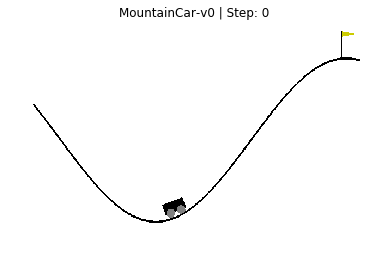

In [29]:
# THIRD STEP: Play!

observation = env.reset()
obs = np.expand_dims(observation, axis=0)
state = np.stack((obs, obs), axis=1)
done = False
tot_reward = 0.0
while not done:
#     env.render()                    # Uncomment to see game running
    show_state(env)
    Q = model.predict(state)        
    action = np.argmax(Q)         
    observation, reward, done, info = env.step(action)
    obs = np.expand_dims(observation, axis=0)
    state = np.append(np.expand_dims(obs, axis=0), state[:, :1, :], axis=1)    
    tot_reward += reward
    
print('Game ended! Total reward: {}'.format(reward))